GitHub [link](https://github.com/Ninad291994/SIT799---Human-Aligned-AI.git)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\61431\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\61431\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\61431\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\61431\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [3]:
df = pd.read_csv(r'C:\Users\61431\Documents\T2 2020\SIT799 Human Aligned Artificial Intelligence\Task\1.3C\data.csv')
df.set_index('id', inplace=True)
display(df.head())

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


Now, let's split the data into training and test sets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

print(X_train.shape)


(3825, 512)


# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [5]:
# START YOUR CODE HERE
model = Sequential()                                  # Initializing Keras model as sequential layers

# Input layer with no of feartures 12 and 1st hidden layer with activation function ReLU
model.add(Dense(12, input_dim=512, activation='relu'))          
model.add(Dense(8, activation='relu'))                # 2nd hidden layer with 8 nodes with activation function ReLU
model.add(Dense(8, activation='relu'))                # 3rd hidden layer with 8 nodes with activation function ReLU
model.add(Dense(1, activation='sigmoid'))             # Output layer with 1 node and activation function Sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Below is the summary of our nueral network - \n')
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Below is the summary of our nueral network - 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                6156      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 6,341
Trainable params: 6,341
Non-trainable params: 0
_________________________________________________________________


# Training

Now, let's start our training.

In [6]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)  # Training the Keras model on train dataset


Epoch 1/200
3825/3825 [==============================] - 0s 64us/step - loss: 0.5850 - accuracy: 0.7009
Epoch 2/200
3825/3825 [==============================] - 0s 25us/step - loss: 0.3059 - accuracy: 0.8724
Epoch 3/200
3825/3825 [==============================] - 0s 26us/step - loss: 0.1181 - accuracy: 0.9725
Epoch 4/200
3825/3825 [==============================] - 0s 29us/step - loss: 0.0436 - accuracy: 0.9937
Epoch 5/200
3825/3825 [==============================] - 0s 21us/step - loss: 0.0204 - accuracy: 0.9971
Epoch 6/200
3825/3825 [==============================] - 0s 22us/step - loss: 0.0107 - accuracy: 0.9990
Epoch 7/200
3825/3825 [==============================] - 0s 22us/step - loss: 0.0063 - accuracy: 0.9995
Epoch 8/200
3825/3825 [==============================] - 0s 20us/step - loss: 0.0042 - accuracy: 0.9997
Epoch 9/200
3825/3825 [==============================] - 0s 23us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/200
3825/3825 [==============================] - 0s 22

3825/3825 [==============================] - 0s 20us/step - loss: 1.9100e-05 - accuracy: 1.0000
Epoch 75/200
3825/3825 [==============================] - 0s 19us/step - loss: 1.8425e-05 - accuracy: 1.0000
Epoch 76/200
3825/3825 [==============================] - 0s 20us/step - loss: 1.7797e-05 - accuracy: 1.0000
Epoch 77/200
3825/3825 [==============================] - 0s 20us/step - loss: 1.7171e-05 - accuracy: 1.0000
Epoch 78/200
3825/3825 [==============================] - 0s 21us/step - loss: 1.6609e-05 - accuracy: 1.0000
Epoch 79/200
3825/3825 [==============================] - 0s 20us/step - loss: 1.6028e-05 - accuracy: 1.0000
Epoch 80/200
3825/3825 [==============================] - 0s 25us/step - loss: 1.5440e-05 - accuracy: 1.0000
Epoch 81/200
3825/3825 [==============================] - 0s 21us/step - loss: 1.4560e-05 - accuracy: 1.0000
Epoch 82/200
3825/3825 [==============================] - 0s 20us/step - loss: 1.3372e-05 - accuracy: 1.0000
Epoch 83/200
3825/3825 [========

3825/3825 [==============================] - 0s 25us/step - loss: 1.1760e-06 - accuracy: 1.0000
Epoch 149/200
3825/3825 [==============================] - 0s 25us/step - loss: 1.1316e-06 - accuracy: 1.0000
Epoch 150/200
3825/3825 [==============================] - 0s 23us/step - loss: 1.0843e-06 - accuracy: 1.0000
Epoch 151/200
3825/3825 [==============================] - 0s 22us/step - loss: 1.0408e-06 - accuracy: 1.0000
Epoch 152/200
3825/3825 [==============================] - 0s 21us/step - loss: 1.0024e-06 - accuracy: 1.0000
Epoch 153/200
3825/3825 [==============================] - 0s 21us/step - loss: 9.6458e-07 - accuracy: 1.0000
Epoch 154/200
3825/3825 [==============================] - 0s 26us/step - loss: 9.2613e-07 - accuracy: 1.0000
Epoch 155/200
3825/3825 [==============================] - 0s 25us/step - loss: 8.8789e-07 - accuracy: 1.0000
Epoch 156/200
3825/3825 [==============================] - 0s 29us/step - loss: 8.5172e-07 - accuracy: 1.0000
Epoch 157/200
3825/3825 

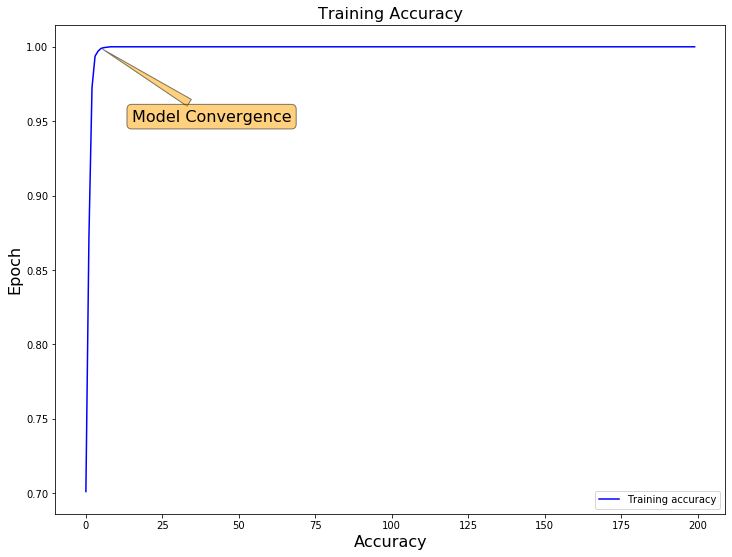

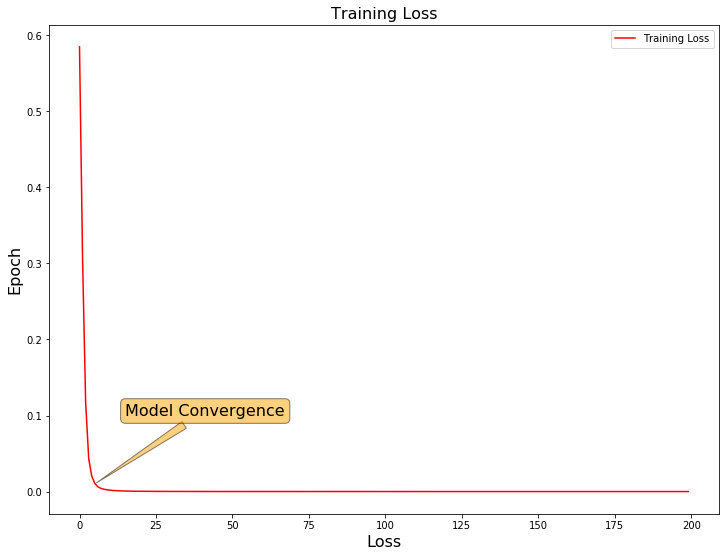

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

# Plotting Training Accuracy 
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.annotate('Model Convergence', xy=(5,0.999), xytext=(15, 0.95),
             size=16, bbox=dict(boxstyle="round", alpha=0.5, fc='orange'),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5, fc='orange'))
plt.xlabel('Accuracy', fontsize = 16)
plt.ylabel('Epoch',fontsize = 16)
plt.title('Training Accuracy',fontsize = 16)
plt.legend()
plt.show()

# Plotting Training Loss
plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'b', label='Training Loss', color='red')
plt.annotate('Model Convergence', xy=(5,0.01), xytext=(15, 0.10),
             size=16, bbox=dict(boxstyle="round", alpha=0.5, fc='orange'),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5, fc='orange'))
plt.xlabel('Loss', fontsize = 16)
plt.ylabel('Epoch', fontsize = 16)
plt.title('Training Loss', fontsize = 16)
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [8]:
# START YOUR CODE HERE
predictions = model.predict_classes(X_test)
print('Below is the actual prediction on test dataset for each row:')
for i in range(0, X_test.shape[0]):
    print('Predicted %d <=> Expected %d' % (predictions[i], y_test[i]))
    
scores = model.evaluate(X_test, y_test, verbose=0)
print("\n\n %s score: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Below is the actual prediction on test dataset for each row:
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 0 <=> Expected 0
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 0 <=> Expected 0
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expected 1
Predicted 1 <=> Expec

# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

